## Read data
Opening and reading the data from the COCTAILL corpus.

In [1]:
data_path = "../data/"

### Exclude stop words

In [12]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words= stopwords.words('swedish')

print(stop_words)

['och', 'det', 'att', 'i', 'en', 'jag', 'hon', 'som', 'han', 'på', 'den', 'med', 'var', 'sig', 'för', 'så', 'till', 'är', 'men', 'ett', 'om', 'hade', 'de', 'av', 'icke', 'mig', 'du', 'henne', 'då', 'sin', 'nu', 'har', 'inte', 'hans', 'honom', 'skulle', 'hennes', 'där', 'min', 'man', 'ej', 'vid', 'kunde', 'något', 'från', 'ut', 'när', 'efter', 'upp', 'vi', 'dem', 'vara', 'vad', 'över', 'än', 'dig', 'kan', 'sina', 'här', 'ha', 'mot', 'alla', 'under', 'någon', 'eller', 'allt', 'mycket', 'sedan', 'ju', 'denna', 'själv', 'detta', 'åt', 'utan', 'varit', 'hur', 'ingen', 'mitt', 'ni', 'bli', 'blev', 'oss', 'din', 'dessa', 'några', 'deras', 'blir', 'mina', 'samma', 'vilken', 'er', 'sådan', 'vår', 'blivit', 'dess', 'inom', 'mellan', 'sådant', 'varför', 'varje', 'vilka', 'ditt', 'vem', 'vilket', 'sitta', 'sådana', 'vart', 'dina', 'vars', 'vårt', 'våra', 'ert', 'era', 'vilkas']


[nltk_data] Downloading package punkt to
[nltk_data]     /home/gusihaliel@GU.GU.SE/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Open and read the XML files

In [49]:
import os
import re
import xml.etree.ElementTree as ET 
from xml.etree.ElementTree import tostring
from itertools import chain

data = {}
all_genres = []

path = data_path+'COCTAILL-full'
for filename in os.listdir(path):   
    # only parse xml files 
    if not filename.endswith('.xml'): continue
    print(filename)
    fullname = os.path.join(path, filename)
    tree = ET.parse(fullname)
    root = tree.getroot() 
    all_name_elements = root.findall('.//lessontext')  

    count = 0
    for elem in all_name_elements:
        count +=1
        
        # some texts might not have genre
        try:
            genres = elem.attrib['genre'] #genre/s       
        except KeyError: 
            genres = "NaN"
            
        genres =re.sub(r'(\|)', ' ', genres)  
        # split into lists
        genres= genres.split(" ")
        genres = [i.split('/') for i in genres]
        # unnest the lists
        genres=list(chain.from_iterable(genres)) 
        # remove empty items
        genres = list(filter(None, genres))
        # remove duplicates
        genres = list(dict.fromkeys(genres))
        
        notags = ET.tostring(elem, encoding='unicode', method='text')              
        # replace abbverbiaton
        notags = notags.replace("t.ex.","till exempel")
        notags = notags.replace("f.kr.","före kristus")
        notags = notags.replace("e.kr.","efter kristus")        
        # remove wierd characters and numbers
        notags = re.sub(r'([\-\_\^\«\:\,\¬\.\%\+\=\/]|[0-9])', ' ', notags)  
        # remove unnecessary whitespaces
        notags = re.sub(r'(\s{2,}|\n)', ' ', notags)  
        # lowercase the words
        low = notags.lower()
        
        data[count] = {
            "genre":genres,
            "sentences":low
        }
        all_genres.append(genres)

nya_mal_1.xml
nya_mal_2.xml
nya_mal_3.xml
pa_svenska_1.xml
pa_svenska_2.xml
pa_svenska_3.xml
rivstartA1A2.xml
rivstart_b1b2.xml
skrivtrappan.xml
Sprakporten_1_2_3.xml
Sprakporten_BAS.xml
Svenska_utifran.xml


### Look at the text and genres

In [50]:
import pprint

pprint.pprint(data)

{1: {'genre': ['other', 'notice'],
     'sentences': ' hej ! jag heter nils owe jag är lärare på stockholms '
                  'universitet jag är gift med ayako hon kommer från japan jag '
                  'har bara ett barn en dotter hon heter elin jag talar '
                  'svenska engelska japanska och koreanska jag är författare '
                  'till svenska utifrån hej ! jag heter roger och jag är också '
                  'lärare i svenska jag bor och arbetar i england men jag '
                  'kommer från stockholm jag är gift med taija hon kommer från '
                  'finland jag talar svenska engelska och lite finska jag har '
                  'en son han heter patrik jag är också författare till '
                  'svenska utifrån '},
 2: {'genre': ['other', 'notice'],
     'sentences': ' jag heter ewa och jag är från polen jag studerar svenska '
                  'på universitetet jag talar polska svenska och lite tyska '
                  'jag är gift ja

      'sentences': ' klockan är sex på morgonen den trettonde december och ute '
                   'är det mörkt och kallt inne hos millan är det emellertid '
                   'ljust och varmt för det står levande ljus överallt och det '
                   'doftar gott i köket står några trötta ungdomar och brygger '
                   'kaffe och värmer upp lussekatter i ugnen klockan sju ska '
                   'de vara i farsta där bor deras lärare och de ska få skjuts '
                   'dit av millans pappa i hans minibuss flickorna tar på sig '
                   'lucialinnen och sätter glitter i håret bara en av pojkarna '
                   'har stjärngossemössa men två stycken har i alla fall vita '
                   'skjortor de går ner till bilen under fniss och stoj och '
                   'millans pappa hyssjar på dem " ni väcker ju upp hela huset '
                   '! " strax före sju är de framme i farsta de åker hiss upp '
                   'läraren bor på tio

       'sentences': ' det är nyårsafton några ungdomar firar millennieskiftet '
                    'tillsammans i en stuga på västkusten under dagen går de '
                    'en promenad ute på klipporna och hittar då ingången till '
                    'en grotta på kvällen bestämmer de sig för att återvända '
                    'till grottan med ficklampor den mörka grottan verkar helt '
                    'outforskad men plötsligt faller ljuset från en ficklampa '
                    'på ett föremål inne i ett hörn det är en lerurna med lock '
                    'på ungdomarna är inte de första mänskliga varelserna som '
                    'går in i grottan en i gänget springer fram till urnan och '
                    'lyfter försiktigt upp den med fingrarna känner han en '
                    'inskription och ber att ficklampsbärarna ska komma med '
                    'lite ljus alla håller andan när de läser " här vilar vårt '
                    'sekel nyårsafton " för

### Using NLPL Models In-Situ
To avoid data duplication, it is recommended to load models (resulting sets of word vectors) from the NLPL repository directly from the NLPL project directory, when working on Saga or Taito. Repository entries are uniformly packaged as .zip compressed archives, but the uniform naming scheming makes it possible to directly read one or more of the model files from the archive.

Each repository entry (i.e. set of word vectors, or 'model') is packaged in the form of a .zip archive, with uniform conventions for file naming inside the file, using the model.txt and model.bin entries for the actual vectors. Each archive includes the relevant excerpts from the catalogue as a file meta.json to help identify the specific contents; a README file included with each model entry provides a life-time unique identifier, e.g. http://vectors.nlpl.eu/repository/20/3.zip for model #3 in the 2.0 release of the repository.

In [51]:
import zipfile
import gensim

model_69 = "69.zip" # Word2Vec Continuous Skipgram
model_173 = "173.zip" # Embeddings from Language Models (ELMo)

repository = data_path
with zipfile.ZipFile(repository + model_69, "r") as archive:
    stream = archive.open("model.txt")
    # In Python, something along the following lines should work to iterate over all of the entries in the model
    #for line in stream:
    
    # Alternatively, if working in a framework like gensim
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=False, unicode_errors='replace')
    #model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True, unicode_errors='replace')
    
    # Binary fastText models (stored as parameters.bin files) should be first extracted 
    # from the .zip archive, and then loaded with
    # model = gensim.models.fasttext.load_facebook_vectors("parameters.bin")

Check for out of vocabulary words.

In [72]:
import numpy as np
oov_words = {}

def get_w2v_vectors(model, word):
    try:
        vec = model.word_vec(word)
    # this exception will occur when a word does not exist in the vocabulary of this model
    except KeyError:        
        print("{} does not exists in the model ".format(word))
        vec = np.random.rand(1,300)[0]
        if word in oov_words:
            oov_words[word] += 1
        else:
            oov_words[word] = 1
    return vec

### Load the word vector model
Load the model and check which words are not in the model, and remove stop words.

In [78]:
import nltk.data

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
from nltk.tokenize import WhitespaceTokenizer

tokenizer = nltk.data.load('tokenizers/punkt/swedish.pickle') # use this to tokenize whole sentences

word_vectors = {}

for n, sent_and_genres in data.items():
    #print(n)
    genres = sent_and_genres['genre']
    sentences = sent_and_genres['sentences']
    #print(sentences)
    

    #tokenized_text = tokenizer.tokenize(sentence)        
    tokenized_text = WhitespaceTokenizer().tokenize(sentences)        
    #print(tokenized_text)
    # remove stop words
    #tokenized_text = [word for word in tokenized_text if not word in stop_words]       

    for word in tokenized_text:
        #print(word)
        # check if the word is not in the model
        #if not word in word_vectors: continue
        vec = get_w2v_vectors(model,word)
        word_vectors[word] = vec

sunhi does not exists in the model 
sunhi does not exists in the model 
sunhi does not exists in the model 
trzmiel does not exists in the model 
trzmiel does not exists in the model 
sanier does not exists in the model 
elavdelning does not exists in the model 
mediabarometern does not exists in the model 
gyllenrik does not exists in the model 
gaspadin does not exists in the model 
medvjedev does not exists in the model 
hoppsudderudderudderullanlej does not exists in the model 
hoppsudderudderudderullanlej does not exists in the model 
hoppsudderudderudderullanlej does not exists in the model 
mentolcigarretter does not exists in the model 
halvtidsstuderande does not exists in the model 
högjämfört does not exists in the model 
blankafors does not exists in the model 
kanotuthyraren does not exists in the model 
linjereparatör does not exists in the model 
utryckningsbidrag does not exists in the model 
mönstringsdagen does not exists in the model 
liljevald does not exists in the

In [79]:
print(f'Number of OOV words: {len(oov_words)}')

Number of OOV words: 66


In [80]:
print(f'Total words: {len(oov_words)+len(word_vectors)}')

Total words: 5492


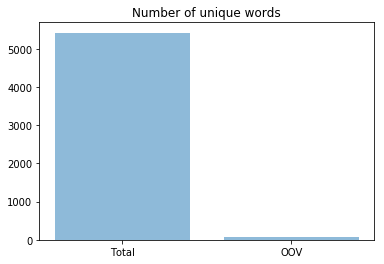

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

objects = ('Total', 'OOV')
y_pos = np.arange(len(objects))
performance = [len(word_vectors), len(oov_words)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Number of unique words')

plt.show()

In [82]:
missing = round(len(oov_words)/len(word_vectors)*100)
print(f'Percentage of missing words: {missing}%')

Percentage of missing words: 1%


## Split data
Data is split into sets of 60/20/20 train/validation/testing.

In [83]:
len(data)

174

In [84]:
totalindices = list(range(len(data)))

In [87]:

import random
import math

random.shuffle(totalindices)
splitindex = math.floor(len(data)*0.6)

In [88]:
splitindex

104

In [90]:
trainingindices = totalindices[:splitindex]
testingindices_ = totalindices[splitindex:]

In [91]:
splitindex2 = math.floor(len(testingindices_)*0.5)

In [92]:
splitindex2

35

In [93]:
testingindices = testingindices_[:splitindex2]
validationindices = testingindices_[splitindex2:]

In [95]:
print(f'Number of training examples: {len(trainingindices)}')
print(f'Number of validation examples: {len(validationindices)}')
print(f'Number of testing examples: {len(testingindices)}')

Number of training examples: 104
Number of validation examples: 35
Number of testing examples: 35
